# Association Rules Mining

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from fim import apriori

In [2]:
df = pd.read_csv("Training_DU_Association.csv", skipinitialspace=True, sep=',')
df

,Model,SubModel,VehYear,IsBadBuy,Auction,VehicleAge,Make,Engine,Trim,Transmission,...,BYRNO,VNZIP1,VNST,IsOnlineSale,Doors,PurchYearMonth,MMRAcquisitionAuctionAveragePriceBin,VehBCostBin,VehOdoBin,WarrantyCostBin
0,1500 RAM_Model,QUAD CAB_SubModel,2002_VehYear,0_IsBadBuy,ADESA_Auction,7_VehicleAge,DODGE_Make,5.9L_Engine,ST_Trim,AUTO_Transmission,...,20234_BYRNO,85226_VNZIP1,AZ_VNST,0_IsOnlineSale,nan_Doors,2009-01_PurchYearMonth,"[4982.588, 7031.882)_MMRAcquisitionAuctionAver...","[6439.353, 8585.471)_VehBCostBin","[57296.941, 63788.059)_VehOdoBin","[875.882, 1289.765)_WarrantyCostBin"
1,1500 RAM_Model,QUAD CAB_SubModel,2003_VehYear,0_IsBadBuy,MANHEIM_Auction,6_VehicleAge,DODGE_Make,5.7L_Engine,LAR_Trim,AUTO_Transmission,...,19619_BYRNO,32824_VNZIP1,FL_VNST,0_IsOnlineSale,nan_Doors,2009-01_PurchYearMonth,"[7031.882, 9081.176)_MMRAcquisitionAuctionAver...","[8585.471, 10731.588)_VehBCostBin","[76770.294, 83261.412)_VehOdoBin","[875.882, 1289.765)_WarrantyCostBin"
2,1500 RAM_Model,QUAD CAB_SubModel,2005_VehYear,0_IsBadBuy,MANHEIM_Auction,4_VehicleAge,DODGE_Make,5.7L_Engine,SLT_Trim,AUTO_Transmission,...,19619_BYRNO,32824_VNZIP1,FL_VNST,0_IsOnlineSale,nan_Doors,2009-01_PurchYearMonth,"[9081.176, 11130.471)_MMRAcquisitionAuctionAve...","[8585.471, 10731.588)_VehBCostBin","[76770.294, 83261.412)_VehOdoBin","[875.882, 1289.765)_WarrantyCostBin"
3,300_Model,SEDAN_SubModel,2006_VehYear,0_IsBadBuy,ADESA_Auction,3_VehicleAge,CHRYSLER_Make,2.7L MPI_Engine,BAS_Trim,AUTO_Transmission,...,20234_BYRNO,85226_VNZIP1,AZ_VNST,0_IsOnlineSale,4D_Doors,2009-01_PurchYearMonth,"[9081.176, 11130.471)_MMRAcquisitionAuctionAve...","[8585.471, 10731.588)_VehBCostBin","[70279.176, 76770.294)_VehOdoBin","[1289.765, 1703.647)_WarrantyCostBin"
4,300_Model,SEDAN_SubModel,2006_VehYear,0_IsBadBuy,MANHEIM_Auction,3_VehicleAge,CHRYSLER_Make,2.7L MPI_Engine,BAS_Trim,AUTO_Transmission,...,20833_BYRNO,75236_VNZIP1,TX_VNST,0_IsOnlineSale,4D_Doors,2009-01_PurchYearMonth,"[9081.176, 11130.471)_MMRAcquisitionAuctionAve...","[8585.471, 10731.588)_VehBCostBin","[63788.059, 70279.176)_VehOdoBin","[875.882, 1289.765)_WarrantyCostBin"
5,300_Model,SEDAN_SubModel,2006_VehYear,0_IsBadBuy,MANHEIM_Auction,3_VehicleAge,CHRYSLER_Make,2.7L MPI_Engine,BAS_Trim,AUTO_Transmission,...,20928_BYRNO,32824_VNZIP1,FL_VNST,0_IsOnlineSale,4D_Doors,2009-01_PurchYearMonth,"[9081.176, 11130.471)_MMRAcquisitionAuctionAve...","[8585.471, 10731.588)_VehBCostBin","[50805.824, 57296.941)_VehOdoBin","[875.882, 1289.765)_WarrantyCostBin"
6,ACCENT_Model,SEDAN_SubModel,2004_VehYear,0_IsBadBuy,OTHER_Auction,5_VehicleAge,HYUNDAI_Make,1.6L MPI_Engine,GL_Trim,AUTO_Transmission,...,835_BYRNO,85009_VNZIP1,AZ_VNST,0_IsOnlineSale,4D_Doors,2009-01_PurchYearMonth,"[884.0, 2933.294)_MMRAcquisitionAuctionAverage...","[2147.118, 4293.235)_VehBCostBin","[70279.176, 76770.294)_VehOdoBin","[875.882, 1289.765)_WarrantyCostBin"
7,ACCENT_Model,SEDAN_SubModel,2005_VehYear,1_IsBadBuy,OTHER_Auction,4_VehicleAge,HYUNDAI_Make,1.6L MPI_Engine,GLS_Trim,AUTO_Transmission,...,835_BYRNO,85009_VNZIP1,AZ_VNST,0_IsOnlineSale,4D_Doors,2009-01_PurchYearMonth,"[2933.294, 4982.588)_MMRAcquisitionAuctionAver...","[4293.235, 6439.353)_VehBCostBin","[50805.824, 57296.941)_VehOdoBin","[462.0, 875.882)_WarrantyCostBin"
8,ACCORD_Model,COUPE_SubModel,2005_VehYear,0_IsBadBuy,MANHEIM_Auction,4_VehicleAge,HONDA_Make,4C 2.4L_Engine,SE_Trim,AUTO_Transmission,...,20392_BYRNO,75236_VNZIP1,TX_VNST,0_IsOnlineSale,2D_Doors,2009-01_PurchYearMonth,"[7031.882, 9081.176)_MMRAcquisitionAuctionAver...","[6439.353, 8585.471)_VehBCostBin","[70279.176, 76770.294)_VehOdoBin","[462.0, 875.882)_WarrantyCostBin"
9,AERIO_Model,SEDAN_SubModel,2003_VehYear,1_IsBadBuy,OTHER_Auction,6_VehicleAge,SUZUKI_Make,2.0L EFI_Engine,S_Trim,AUTO_Transmission,...,835_BYRNO,85009_VNZIP1,AZ_VNST,0_IsOnlineSale,4D_Doors,2009-01_PurchYearMonth,"[884.0, 2933.294)_MMRAcquisitionAuctionAverage...","[4293.235, 6439.353)_VehBCostBin","[70279.176, 76770.294)_VehOdoBin","[875.882, 1289.765)_Warran

In [3]:
help(apriori)

Help on built-in function apriori in module fim:

apriori(...)
    apriori (tracts, target='s', supp=10, zmin=1, zmax=None, report='a',
             eval='x', agg='x', thresh=10, prune=None, algo='b', mode='',
             border=None)
    Find frequent item sets with the Apriori algorithm.
    tracts  transaction database to mine (mandatory)
            The database must be an iterable of transactions;
            each transaction must be an iterable of items;
            each item must be a hashable object.
            If the database is a dictionary, the transactions are
            the keys, the values their (integer) multiplicities.
    target  type of frequent item sets to find     (default: s)
            s/a   sets/all   all     frequent item sets
            c     closed     closed  frequent item sets
            m     maximal    maximal frequent item sets
            g     gens       generators
            r     rules      association rules
    supp    minimum support of an i

*** Variabili ***

In [4]:
#df_categorical = df[['Make', 'SubModel', 'Size', 'VNST', 'VehicleAge', 'IsBadBuy']]
df_numerical = df[['MMRAcquisitionAuctionAveragePriceBin', 'VehBCostBin', 'VehOdoBin', 'WarrantyCostBin', 'IsBadBuy']].copy()
df_categorical = df[df.columns.difference(df_numerical.columns[:-1])].copy()

Baskets dei DataFrame

In [5]:
df

,Model,SubModel,VehYear,IsBadBuy,Auction,VehicleAge,Make,Engine,Trim,Transmission,...,BYRNO,VNZIP1,VNST,IsOnlineSale,Doors,PurchYearMonth,MMRAcquisitionAuctionAveragePriceBin,VehBCostBin,VehOdoBin,WarrantyCostBin
0,1500 RAM_Model,QUAD CAB_SubModel,2002_VehYear,0_IsBadBuy,ADESA_Auction,7_VehicleAge,DODGE_Make,5.9L_Engine,ST_Trim,AUTO_Transmission,...,20234_BYRNO,85226_VNZIP1,AZ_VNST,0_IsOnlineSale,nan_Doors,2009-01_PurchYearMonth,"[4982.588, 7031.882)_MMRAcquisitionAuctionAver...","[6439.353, 8585.471)_VehBCostBin","[57296.941, 63788.059)_VehOdoBin","[875.882, 1289.765)_WarrantyCostBin"
1,1500 RAM_Model,QUAD CAB_SubModel,2003_VehYear,0_IsBadBuy,MANHEIM_Auction,6_VehicleAge,DODGE_Make,5.7L_Engine,LAR_Trim,AUTO_Transmission,...,19619_BYRNO,32824_VNZIP1,FL_VNST,0_IsOnlineSale,nan_Doors,2009-01_PurchYearMonth,"[7031.882, 9081.176)_MMRAcquisitionAuctionAver...","[8585.471, 10731.588)_VehBCostBin","[76770.294, 83261.412)_VehOdoBin","[875.882, 1289.765)_WarrantyCostBin"
2,1500 RAM_Model,QUAD CAB_SubModel,2005_VehYear,0_IsBadBuy,MANHEIM_Auction,4_VehicleAge,DODGE_Make,5.7L_Engine,SLT_Trim,AUTO_Transmission,...,19619_BYRNO,32824_VNZIP1,FL_VNST,0_IsOnlineSale,nan_Doors,2009-01_PurchYearMonth,"[9081.176, 11130.471)_MMRAcquisitionAuctionAve...","[8585.471, 10731.588)_VehBCostBin","[76770.294, 83261.412)_VehOdoBin","[875.882, 1289.765)_WarrantyCostBin"
3,300_Model,SEDAN_SubModel,2006_VehYear,0_IsBadBuy,ADESA_Auction,3_VehicleAge,CHRYSLER_Make,2.7L MPI_Engine,BAS_Trim,AUTO_Transmission,...,20234_BYRNO,85226_VNZIP1,AZ_VNST,0_IsOnlineSale,4D_Doors,2009-01_PurchYearMonth,"[9081.176, 11130.471)_MMRAcquisitionAuctionAve...","[8585.471, 10731.588)_VehBCostBin","[70279.176, 76770.294)_VehOdoBin","[1289.765, 1703.647)_WarrantyCostBin"
4,300_Model,SEDAN_SubModel,2006_VehYear,0_IsBadBuy,MANHEIM_Auction,3_VehicleAge,CHRYSLER_Make,2.7L MPI_Engine,BAS_Trim,AUTO_Transmission,...,20833_BYRNO,75236_VNZIP1,TX_VNST,0_IsOnlineSale,4D_Doors,2009-01_PurchYearMonth,"[9081.176, 11130.471)_MMRAcquisitionAuctionAve...","[8585.471, 10731.588)_VehBCostBin","[63788.059, 70279.176)_VehOdoBin","[875.882, 1289.765)_WarrantyCostBin"
5,300_Model,SEDAN_SubModel,2006_VehYear,0_IsBadBuy,MANHEIM_Auction,3_VehicleAge,CHRYSLER_Make,2.7L MPI_Engine,BAS_Trim,AUTO_Transmission,...,20928_BYRNO,32824_VNZIP1,FL_VNST,0_IsOnlineSale,4D_Doors,2009-01_PurchYearMonth,"[9081.176, 11130.471)_MMRAcquisitionAuctionAve...","[8585.471, 10731.588)_VehBCostBin","[50805.824, 57296.941)_VehOdoBin","[875.882, 1289.765)_WarrantyCostBin"
6,ACCENT_Model,SEDAN_SubModel,2004_VehYear,0_IsBadBuy,OTHER_Auction,5_VehicleAge,HYUNDAI_Make,1.6L MPI_Engine,GL_Trim,AUTO_Transmission,...,835_BYRNO,85009_VNZIP1,AZ_VNST,0_IsOnlineSale,4D_Doors,2009-01_PurchYearMonth,"[884.0, 2933.294)_MMRAcquisitionAuctionAverage...","[2147.118, 4293.235)_VehBCostBin","[70279.176, 76770.294)_VehOdoBin","[875.882, 1289.765)_WarrantyCostBin"
7,ACCENT_Model,SEDAN_SubModel,2005_VehYear,1_IsBadBuy,OTHER_Auction,4_VehicleAge,HYUNDAI_Make,1.6L MPI_Engine,GLS_Trim,AUTO_Transmission,...,835_BYRNO,85009_VNZIP1,AZ_VNST,0_IsOnlineSale,4D_Doors,2009-01_PurchYearMonth,"[2933.294, 4982.588)_MMRAcquisitionAuctionAver...","[4293.235, 6439.353)_VehBCostBin","[50805.824, 57296.941)_VehOdoBin","[462.0, 875.882)_WarrantyCostBin"
8,ACCORD_Model,COUPE_SubModel,2005_VehYear,0_IsBadBuy,MANHEIM_Auction,4_VehicleAge,HONDA_Make,4C 2.4L_Engine,SE_Trim,AUTO_Transmission,...,20392_BYRNO,75236_VNZIP1,TX_VNST,0_IsOnlineSale,2D_Doors,2009-01_PurchYearMonth,"[7031.882, 9081.176)_MMRAcquisitionAuctionAver...","[6439.353, 8585.471)_VehBCostBin","[70279.176, 76770.294)_VehOdoBin","[462.0, 875.882)_WarrantyCostBin"
9,AERIO_Model,SEDAN_SubModel,2003_VehYear,1_IsBadBuy,OTHER_Auction,6_VehicleAge,SUZUKI_Make,2.0L EFI_Engine,S_Trim,AUTO_Transmission,...,835_BYRNO,85009_VNZIP1,AZ_VNST,0_IsOnlineSale,4D_Doors,2009-01_PurchYearMonth,"[884.0, 2933.294)_MMRAcquisitionAuctionAverage...","[4293.235, 6439.353)_VehBCostBin","[70279.176, 76770.294)_VehOdoBin","[875.882, 1289.765)_Warran

In [6]:
baskets_All = df.values.tolist()

del df

In [7]:
df_categorical

,Auction,BYRNO,Doors,Engine,IsBadBuy,IsOnlineSale,Make,Model,Nationality,PurchYearMonth,Size,SubModel,TopThreeAmericanName,Transmission,Trim,VNST,VNZIP1,VehYear,VehicleAge,WheelTypeID
0,ADESA_Auction,20234_BYRNO,nan_Doors,5.9L_Engine,0_IsBadBuy,0_IsOnlineSale,DODGE_Make,1500 RAM_Model,AMERICAN_Nationality,2009-01_PurchYearMonth,LARGE TRUCK_Size,QUAD CAB_SubModel,CHRYSLER_TopThreeAmericanName,AUTO_Transmission,ST_Trim,AZ_VNST,85226_VNZIP1,2002_VehYear,7_VehicleAge,1.0_WheelTypeID
1,MANHEIM_Auction,19619_BYRNO,nan_Doors,5.7L_Engine,0_IsBadBuy,0_IsOnlineSale,DODGE_Make,1500 RAM_Model,AMERICAN_Nationality,2009-01_PurchYearMonth,LARGE TRUCK_Size,QUAD CAB_SubModel,CHRYSLER_TopThreeAmericanName,AUTO_Transmission,LAR_Trim,FL_VNST,32824_VNZIP1,2003_VehYear,6_VehicleAge,1.0_WheelTypeID
2,MANHEIM_Auction,19619_BYRNO,nan_Doors,5.7L_Engine,0_IsBadBuy,0_IsOnlineSale,DODGE_Make,1500 RAM_Model,AMERICAN_Nationality,2009-01_PurchYearMonth,LARGE TRUCK_Size,QUAD CAB_SubModel,CHRYSLER_TopThreeAmericanName,AUTO_Transmission,SLT_Trim,FL_VNST,32824_VNZIP1,2005_VehYear,4_VehicleAge,2.0_WheelTypeID
3,ADESA_Auction,20234_BYRNO,4D_Doors,2.7L MPI_Engine,0_IsBadBuy,0_IsOnlineSale,CHRYSLER_Make,300_Model,AMERICAN_Nationality,2009-01_PurchYearMonth,SPECIALTY_Size,SEDAN_SubModel,CHRYSLER_TopThreeAmericanName,AUTO_Transmission,BAS_Trim,AZ_VNST,85226_VNZIP1,2006_VehYear,3_VehicleAge,2.0_WheelTypeID
4,MANHEIM_Auction,20833_BYRNO,4D_Doors,2.7L MPI_Engine,0_IsBadBuy,0_IsOnlineSale,CHRYSLER_Make,300_Model,AMERICAN_Nationality,2009-01_PurchYearMonth,SPECIALTY_Size,SEDAN_SubModel,CHRYSLER_TopThreeAmericanName,AUTO_Transmission,BAS_Trim,TX_VNST,75236_VNZIP1,2006_VehYear,3_VehicleAge,1.0_WheelTypeID
5,MANHEIM_Auction,20928_BYRNO,4D_Doors,2.7L MPI_Engine,0_IsBadBuy,0_IsOnlineSale,CHRYSLER_Make,300_Model,AMERICAN_Nationality,2009-01_PurchYearMonth,SPECIALTY_Size,SEDAN_SubModel,CHRYSLER_TopThreeAmericanName,AUTO_Transmission,BAS_Trim,FL_VNST,32824_VNZIP1,2006_VehYear,3_VehicleAge,2.0_WheelTypeID
6,OTHER_Auction,835_BYRNO,4D_Doors,1.6L MPI_Engine,0_IsBadBuy,0_IsOnlineSale,HYUNDAI_Make,ACCENT_Model,NOT AMERICAN_Nationality,2009-01_PurchYearMonth,COMPACT_Size,SEDAN_SubModel,OTHER_TopThreeAmericanName,AUTO_Transmission,GL_Trim,AZ_VNST,85009_VNZIP1,2004_VehYear,5_VehicleAge,2.0_WheelTypeID
7,OTHER_Auction,835_BYRNO,4D_Doors,1.6L MPI_Engine,1_IsBadBuy,0_IsOnlineSale,HYUNDAI_Make,ACCENT_Model,NOT AMERICAN_Nationality,2009-01_PurchYearMonth,COMPACT_Size,SEDAN_SubModel,OTHER_TopThreeAmericanName,AUTO_Transmission,GLS_Trim,AZ_VNST,85009_VNZIP1,2005_VehYear,4_VehicleAge,1.0_WheelTypeID
8,MANHEIM_Auction,20392_BYRNO,2D_Doors,4C 2.4L_Engine,0_IsBadBuy,0_IsOnlineSale,HONDA_Make,ACCORD_Model,NOT AMERICAN_Nationality,2009-01_PurchYearMonth,MEDIUM_Size,COUPE_SubModel,OTHER_TopThreeAmericanName,AUTO_Transmission,SE_Trim,TX_VNST,75236_VNZIP1,2005_VehYear,4_VehicleAge,1.0_WheelTypeID
9,OTHER_Auction,835_BYRNO,4D_Doors,2.0L EFI_Engine,1_IsBadBuy,0_IsOnlineSale,SUZUKI_Make,AERIO_Model,NOT AMERICAN_Nationality,2009-01_PurchYearMonth,COMPACT_Size,SEDAN_SubModel,OTHER_TopThreeAmericanName,AUTO_Transmission,S_Trim,AZ_VNST,85009_VNZIP1,2003_VehYear,6_VehicleAge,1.0_WheelTypeID


In [8]:
baskets_Categorical = df_categorical.values.tolist()

del df_categorical

In [9]:
df_numerical

,MMRAcquisitionAuctionAveragePriceBin,VehBCostBin,VehOdoBin,WarrantyCostBin,IsBadBuy
0,"[4982.588, 7031.882)_MMRAcquisitionAuctionAver...","[6439.353, 8585.471)_VehBCostBin","[57296.941, 63788.059)_VehOdoBin","[875.882, 1289.765)_WarrantyCostBin",0_IsBadBuy
1,"[7031.882, 9081.176)_MMRAcquisitionAuctionAver...","[8585.471, 10731.588)_VehBCostBin","[76770.294, 83261.412)_VehOdoBin","[875.882, 1289.765)_WarrantyCostBin",0_IsBadBuy
2,"[9081.176, 11130.471)_MMRAcquisitionAuctionAve...","[8585.471, 10731.588)_VehBCostBin","[76770.294, 83261.412)_VehOdoBin","[875.882, 1289.765)_WarrantyCostBin",0_IsBadBuy
3,"[9081.176, 11130.471)_MMRAcquisitionAuctionAve...","[8585.471, 10731.588)_VehBCostBin","[70279.176, 76770.294)_VehOdoBin","[1289.765, 1703.647)_WarrantyCostBin",0_IsBadBuy
4,"[9081.176, 11130.471)_MMRAcquisitionAuctionAve...","[8585.471, 10731.588)_VehBCostBin","[63788.059, 70279.176)_VehOdoBin","[875.882, 1289.765)_WarrantyCostBin",0_IsBadBuy
5,"[9081.176, 11130.471)_MMRAcquisitionAuctionAve...","[8585.471, 10731.588)_VehBCostBin","[50805.824, 57296.941)_VehOdoBin","[875.882, 1289.765)_WarrantyCostBin",0_IsBadBuy
6,"[884.0, 2933.294)_MMRAcquisitionAuctionAverage...","[2147.118, 4293.235)_VehBCostBin","[70279.176, 76770.294)_VehOdoBin","[875.882, 1289.765)_WarrantyCostBin",0_IsBadBuy
7,"[2933.294, 4982.588)_MMRAcquisitionAuctionAver...","[4293.235, 6439.353)_VehBCostBin","[50805.824, 57296.941)_VehOdoBin","[462.0, 875.882)_WarrantyCostBin",1_IsBadBuy
8,"[7031.882, 9081.176)_MMRAcquisitionAuctionAver...","[6439.353, 8585.471)_VehBCostBin","[70279.176, 76770.294)_VehOdoBin","[462.0, 875.882)_WarrantyCostBin",0_IsBadBuy
9,"[884.0, 2933.294)_MMRAcquisitionAuctionAverage...","[4293.235, 6439.353)_VehBCostBin","[70279.176, 76770.294)_VehOdoBin","[875.882, 1289.765)_WarrantyCostBin",1_IsBadBuy


In [10]:
baskets_Numerical = df_numerical.values.tolist()

del df_numerical

Minimum Support e Minimum Confidence in percentuale

In [13]:
MinSupp_Floor = 1 #%

In [14]:
MinConf_Floor = 10 #%

## Mining per livello di Min Confidence

In [15]:
rules_list = list()
rules_len = list()

i = 0

for MC in range(MinConf_Floor, 102, 2):
    rules_list.append(
        apriori(baskets_All, supp = MinSupp_Floor, conf = MC, zmin=2, zmax=4, target='r', report='aSCl')
    )
    rules_len.append(len(rules_list[i]))
    print('Numero di Association Rules con Min Confidence = ' + str(MC) + ' %: ' + str(rules_len[i]))
    i+=1

Numero di Association Rules con Min Confidence = 10 %: 1684485
Numero di Association Rules con Min Confidence = 12 %: 1488981
Numero di Association Rules con Min Confidence = 14 %: 1331466
Numero di Association Rules con Min Confidence = 16 %: 1195487
Numero di Association Rules con Min Confidence = 18 %: 1070747
Numero di Association Rules con Min Confidence = 20 %: 957804
Numero di Association Rules con Min Confidence = 22 %: 860392
Numero di Association Rules con Min Confidence = 24 %: 779485
Numero di Association Rules con Min Confidence = 26 %: 715563
Numero di Association Rules con Min Confidence = 28 %: 661773
Numero di Association Rules con Min Confidence = 30 %: 615897
Numero di Association Rules con Min Confidence = 32 %: 576107
Numero di Association Rules con Min Confidence = 34 %: 541174
Numero di Association Rules con Min Confidence = 36 %: 510321
Numero di Association Rules con Min Confidence = 38 %: 483389
Numero di Association Rules con Min Confidence = 40 %: 459678
Num

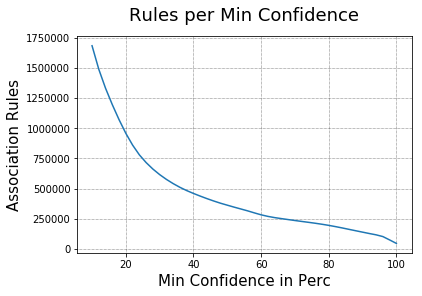

In [16]:
plt.plot(range(MinConf_Floor, 102, 2), rules_len)
plt.title('Rules per Min Confidence', fontsize=18, pad=15)
plt.ylabel('Association Rules', fontsize=15)
plt.xlabel('Min Confidence in Perc', fontsize=15)
plt.tick_params(axis='both', labelsize=10, pad=3)
#plt.axis([0, 30, 0, len(rules_list[0]) + 100])
plt.grid(color='black', linestyle=':', linewidth=0.5)
plt.plot(figsize=(20,5))
plt.show()

In [17]:
rules_list[9][:20]

[('CX_Trim',
  ('BUICK_Make', 'GM_TopThreeAmericanName', 'AMERICAN_Nationality'),
  177,
  0.347699681766393,
  32.240437158469945,
  92.72495446265938),
 ('CX_Trim',
  ('BUICK_Make', 'GM_TopThreeAmericanName', '4D_Doors'),
  177,
  0.347699681766393,
  32.240437158469945,
  92.72495446265938),
 ('CX_Trim',
  ('BUICK_Make', 'GM_TopThreeAmericanName', 'AUTO_Transmission'),
  177,
  0.347699681766393,
  32.240437158469945,
  92.72495446265938),
 ('CX_Trim',
  ('BUICK_Make', 'GM_TopThreeAmericanName', '0_IsOnlineSale'),
  170,
  0.33394884689427573,
  31.59851301115242,
  90.87875160145339),
 ('CX_Trim',
  ('BUICK_Make', 'GM_TopThreeAmericanName'),
  177,
  0.347699681766393,
  32.240437158469945,
  92.72495446265938),
 ('CX_Trim',
  ('BUICK_Make', 'AMERICAN_Nationality', '4D_Doors'),
  177,
  0.347699681766393,
  32.240437158469945,
  92.72495446265938),
 ('CX_Trim',
  ('BUICK_Make', 'AMERICAN_Nationality', 'AUTO_Transmission'),
  177,
  0.347699681766393,
  32.240437158469945,
  92.7249

In [18]:
del rules_list
del rules_len

del MinSupp_Floor
del MinConf_Floor

In [19]:
MinSupp_Perc = 0.01 #%

In [20]:
MinConf_Perc = 80  #%

In [21]:
ValueToMine = '1_IsBadBuy'

## Rules Extraction

### 1) Tutto il Dataset

In [22]:
rules = apriori(baskets_All,
                supp = MinSupp_Perc,
                conf = MinConf_Perc,
                zmin=2, zmax=4,
                target='r',
                report='aSCl')

In [23]:
print('Number of rules:', len(rules))

Number of rules: 10945398


In [24]:
for r in rules[:3]:
    print(r)
    print('r[0] = -> B = ' + str(r[0]),
          '\nr[1] = A -> = ' + str(r[1]),
          '\nr[2] = Supporto in assoluto (n. elem) = ' + str(r[2]),
          '\nr[3] = Supporto in percentuale = ' + str(r[3]),
          '\nr[4] = Confidence in percentuale = ' + str(r[4]),
          '\nr[5] = Lift in assoluto = ' + str(r[5])
          + '\n')

('MAZDA5_SubModel', ('MAZDA5_Model', '2007_VehYear', '[6439.353, 8585.471)_VehBCostBin'), 5, 0.009822024908655169, 83.33333333333334, 8484.333333333334)
r[0] = -> B = MAZDA5_SubModel 
r[1] = A -> = ('MAZDA5_Model', '2007_VehYear', '[6439.353, 8585.471)_VehBCostBin') 
r[2] = Supporto in assoluto (n. elem) = 5 
r[3] = Supporto in percentuale = 0.009822024908655169 
r[4] = Confidence in percentuale = 83.33333333333334 
r[5] = Lift in assoluto = 8484.333333333334

('XD_Model', ('3106_VNZIP1', 'SCION_Make', '[9081.176, 11130.471)_MMRAcquisitionAuctionAveragePriceBin'), 5, 0.009822024908655169, 83.33333333333334, 8484.333333333334)
r[0] = -> B = XD_Model 
r[1] = A -> = ('3106_VNZIP1', 'SCION_Make', '[9081.176, 11130.471)_MMRAcquisitionAuctionAveragePriceBin') 
r[2] = Supporto in assoluto (n. elem) = 5 
r[3] = Supporto in percentuale = 0.009822024908655169 
r[4] = Confidence in percentuale = 83.33333333333334 
r[5] = Lift in assoluto = 8484.333333333334

('XD_Model', ('3106_VNZIP1', 'SCION_Ma

ordino tutte le rules trovate per Lift decrescente

In [25]:
def sortPosition(r_th): 
    return r_th[5]

rules.sort(key = sortPosition, reverse = True)

le prime rules sono quelle con il lift più alto

In [26]:
count = 0

for r in rules:
    if r[3] >= 1:
        print(r)
        
        count+=1
        if count == 50:
            break

('80229_VNZIP1', ('CO_VNST', 'OTHER_Auction'), 517, 1.0155973755549446, 99.8069498069498, 98.27413127413128)
('80229_VNZIP1', ('CO_VNST', 'OTHER_Auction', '0_IsOnlineSale'), 513, 1.0077397556280203, 99.80544747081711, 98.27265201062701)
('F150_Model', ('LARGE TRUCK_Size', 'nan_Doors', 'FORD_Make'), 584, 1.1472125093309238, 99.31972789115646, 86.57482993197279)
('F150_Model', ('LARGE TRUCK_Size', 'nan_Doors', 'FORD_TopThreeAmericanName'), 584, 1.1472125093309238, 99.31972789115646, 86.57482993197279)
('F150_Model', ('LARGE TRUCK_Size', 'FORD_Make', 'FORD_TopThreeAmericanName'), 584, 1.1472125093309238, 99.31972789115646, 86.57482993197279)
('F150_Model', ('LARGE TRUCK_Size', 'FORD_Make', 'AMERICAN_Nationality'), 584, 1.1472125093309238, 99.31972789115646, 86.57482993197279)
('F150_Model', ('LARGE TRUCK_Size', 'FORD_Make'), 584, 1.1472125093309238, 99.31972789115646, 86.57482993197279)
('F150_Model', ('LARGE TRUCK_Size', 'FORD_TopThreeAmericanName', 'AMERICAN_Nationality'), 584, 1.147212

rules con il lift più basso

In [27]:
for r in rules[-5:]:
    print(r)

('0_IsOnlineSale', ('[2147.118, 4293.235)_VehBCostBin', '2_VehicleAge', '[875.882, 1289.765)_WarrantyCostBin'), 8, 0.01571523985384827, 80.0, 0.8208824655822298)
('0_IsOnlineSale', ('[2147.118, 4293.235)_VehBCostBin', '2_VehicleAge', 'nan_Engine'), 8, 0.01571523985384827, 80.0, 0.8208824655822298)
('0_IsOnlineSale', ('2008_VehYear', 'FORD_TopThreeAmericanName', 'BAS_Trim'), 36, 0.07071857934231722, 80.0, 0.8208824655822298)
('0_IsOnlineSale', ('2008_VehYear', '[1289.765, 1703.647)_WarrantyCostBin', '[4982.588, 7031.882)_MMRAcquisitionAuctionAveragePriceBin'), 8, 0.01571523985384827, 80.0, 0.8208824655822298)
('0_IsOnlineSale', ('COMPACT_Size', '[8585.471, 10731.588)_VehBCostBin', '[462.0, 875.882)_WarrantyCostBin'), 16, 0.03143047970769654, 80.0, 0.8208824655822298)


Insieme delle Consequence delle Rule (sono il primo elemento della rule: quello nella posizione 0)

In [28]:
Consequence_Set = list()

for r in rules:
    Consequence_Set.append(r[0])

Consequence_Set = set(Consequence_Set)

In [29]:
len(Consequence_Set)

749

In [30]:
del Consequence_Set

** - Top Rules **

In [31]:
topRules = list()

for r in rules:
    if r[3] <= 5 and r[5] >= 2:
        topRules.append(r)

print('\nNumero di topRules: ' + str(len(topRules)))


Numero di topRules: 4597326


In [32]:
del rules

- Focus sul valore da minare

In [33]:
def sortPosition(r_th): 
    return r_th[3]

topRules.sort(key = sortPosition, reverse = True)

In [34]:
count=0

for r in topRules:
    if r[0] == ValueToMine:
        print(r)
        count+=1
        
print('\n\nNumero di Top Rules in cui è presente ' + ValueToMine + ': ' + str(count))

('1_IsBadBuy', ('74135_VNZIP1', '2010-06_PurchYearMonth', '1.0_WheelTypeID'), 17, 0.03339488468942757, 100.0, 7.982750509644033)
('1_IsBadBuy', ('2010-06_PurchYearMonth', '99761_BYRNO', '1.0_WheelTypeID'), 17, 0.03339488468942757, 100.0, 7.982750509644033)
('1_IsBadBuy', ('NV_VNST', '4.0L_Engine', '1.0_WheelTypeID'), 9, 0.017679644835579305, 90.0, 7.18447545867963)
('1_IsBadBuy', ('MONTERO SPORT_Model', 'TX_VNST', '[1289.765, 1703.647)_WarrantyCostBin'), 9, 0.017679644835579305, 81.81818181818183, 6.531341326072391)
('1_IsBadBuy', ('NV_VNST', '4.0L_Engine', 'MANHEIM_Auction'), 9, 0.017679644835579305, 81.81818181818183, 6.531341326072391)
('1_IsBadBuy', ('NV_VNST', '4.0L_Engine', 'AUTO_Transmission'), 9, 0.017679644835579305, 81.81818181818183, 6.531341326072391)
('1_IsBadBuy', ('NV_VNST', '4.0L_Engine'), 9, 0.017679644835579305, 81.81818181818183, 6.531341326072391)
('1_IsBadBuy', ('NV_VNST', 'MEDIUM SUV_Size', 'FORD_TopThreeAmericanName'), 9, 0.017679644835579305, 81.81818181818183, 

In [35]:
del topRules

### 2) Solo Attributi Categorici

In [34]:
rules = apriori(baskets_Categorical,
                supp = MinSupp_Perc,
                conf = MinConf_Perc,
                zmin=2, zmax=4,
                target='r',
                report='aSCl')

In [35]:
del baskets_Categorical

In [36]:
print('Number of rules:', len(rules))

Number of rules: 6374958


ordino tutte le rules trovate per lift decrescente

In [37]:
def sortPosition(r_th): 
    return r_th[5]

rules.sort(key = sortPosition, reverse = True)

le prime rules sono quelle con il lift più alto

In [38]:
count = 0

for r in rules:
    if r[3] >= 1:
        print(r)
        
        count+=1
        if count == 50:
            break

('80229_VNZIP1', ('CO_VNST', 'OTHER_Auction'), 517, 1.0155973755549446, 99.8069498069498, 98.27413127413128)
('80229_VNZIP1', ('CO_VNST', 'OTHER_Auction', '0_IsOnlineSale'), 513, 1.0077397556280203, 99.80544747081711, 98.27265201062701)
('F150_Model', ('LARGE TRUCK_Size', 'nan_Doors', 'FORD_Make'), 584, 1.1472125093309238, 99.31972789115646, 86.57482993197279)
('F150_Model', ('LARGE TRUCK_Size', 'nan_Doors', 'FORD_TopThreeAmericanName'), 584, 1.1472125093309238, 99.31972789115646, 86.57482993197279)
('F150_Model', ('LARGE TRUCK_Size', 'FORD_Make', 'FORD_TopThreeAmericanName'), 584, 1.1472125093309238, 99.31972789115646, 86.57482993197279)
('F150_Model', ('LARGE TRUCK_Size', 'FORD_Make', 'AMERICAN_Nationality'), 584, 1.1472125093309238, 99.31972789115646, 86.57482993197279)
('F150_Model', ('LARGE TRUCK_Size', 'FORD_Make'), 584, 1.1472125093309238, 99.31972789115646, 86.57482993197279)
('F150_Model', ('LARGE TRUCK_Size', 'FORD_TopThreeAmericanName', 'AMERICAN_Nationality'), 584, 1.147212

rules con il lift più basso

** - Top Rules **

In [39]:
topRules = list()

for r in rules:
    if r[3] <= 5 and r[5] >= 2:
        topRules.append(r)

print('\nNumero di topRules: ' + str(len(topRules)))


Numero di topRules: 2589127


In [40]:
del rules

- Focus sul Valore da Minare

In [41]:
def sortPosition(r_th): 
    return r_th[3]

topRules.sort(key = sortPosition, reverse = True)

In [42]:
count=0

for r in topRules:
    if r[0] == ValueToMine:
        print(r)
        count+=1
        
print('\n\nNumero di Top Rules in cui è presente ' + ValueToMine + ': ' + str(count))

('1_IsBadBuy', ('74135_VNZIP1', '2010-06_PurchYearMonth', '1.0_WheelTypeID'), 17, 0.03339488468942757, 100.0, 7.982750509644033)
('1_IsBadBuy', ('2010-06_PurchYearMonth', '99761_BYRNO', '1.0_WheelTypeID'), 17, 0.03339488468942757, 100.0, 7.982750509644033)
('1_IsBadBuy', ('NV_VNST', '4.0L_Engine', '1.0_WheelTypeID'), 9, 0.017679644835579305, 90.0, 7.18447545867963)
('1_IsBadBuy', ('NV_VNST', '4.0L_Engine', 'MANHEIM_Auction'), 9, 0.017679644835579305, 81.81818181818183, 6.531341326072391)
('1_IsBadBuy', ('NV_VNST', '4.0L_Engine', 'AUTO_Transmission'), 9, 0.017679644835579305, 81.81818181818183, 6.531341326072391)
('1_IsBadBuy', ('NV_VNST', '4.0L_Engine'), 9, 0.017679644835579305, 81.81818181818183, 6.531341326072391)
('1_IsBadBuy', ('NV_VNST', 'MEDIUM SUV_Size', 'FORD_TopThreeAmericanName'), 9, 0.017679644835579305, 81.81818181818183, 6.531341326072391)
('1_IsBadBuy', ('XLS_Trim', '2010-04_PurchYearMonth', 'MEDIUM SUV_Size'), 9, 0.017679644835579305, 81.81818181818183, 6.531341326072391

In [43]:
del topRules

### 3) Solo Attributi Numerici

In [44]:
rules = apriori(baskets_Numerical,
                supp = MinSupp_Perc,
                conf = MinConf_Perc,
                zmin=2, zmax=4,
                target='r',
                report='aSCl')

In [45]:
del baskets_Numerical

In [46]:
print('Number of rules:', len(rules))

Number of rules: 1330


ordino tutte le rules trovate per lift decrescente

In [47]:
def sortPosition(r_th): 
    return r_th[5]

rules.sort(key = sortPosition, reverse = True)

le prime rules sono quelle con il lift più alto

In [48]:
count = 0

for r in rules:
    if r[3] >= 1:
        print(r)
        
        count+=1
        if count == 50:
            break

('[462.0, 875.882)_WarrantyCostBin', ('[44314.706, 50805.824)_VehOdoBin', '[7031.882, 9081.176)_MMRAcquisitionAuctionAveragePriceBin', '[6439.353, 8585.471)_VehBCostBin'), 982, 1.929045692059875, 81.49377593360995, 2.85298270935723)
('[462.0, 875.882)_WarrantyCostBin', ('[44314.706, 50805.824)_VehOdoBin', '[7031.882, 9081.176)_MMRAcquisitionAuctionAveragePriceBin', '0_IsBadBuy'), 1007, 1.978155816603151, 80.49560351718625, 2.818038094110366)
('[462.0, 875.882)_WarrantyCostBin', ('[44314.706, 50805.824)_VehOdoBin', '[7031.882, 9081.176)_MMRAcquisitionAuctionAveragePriceBin'), 1070, 2.1019133304522057, 80.14981273408239, 2.8059324441518454)
('[4293.235, 6439.353)_VehBCostBin', ('[50805.824, 57296.941)_VehOdoBin', '[2933.294, 4982.588)_MMRAcquisitionAuctionAveragePriceBin', '0_IsBadBuy'), 770, 1.512591835932896, 84.06113537117903, 2.28725007066398)
('[4293.235, 6439.353)_VehBCostBin', ('[50805.824, 57296.941)_VehOdoBin', '[2933.294, 4982.588)_MMRAcquisitionAuctionAveragePriceBin'), 866, 1

** - Top Rules **

In [49]:
topRules = list()

for r in rules:
    if r[3] <= 5 and r[5] >= 2:
        topRules.append(r)

print('\nNumero di topRules: ' + str(len(topRules)))


Numero di topRules: 239


In [50]:
del rules

- Focus sul Valore da Minare

In [51]:
def sortPosition(r_th): 
    return r_th[3]

topRules.sort(key = sortPosition, reverse = True)

In [52]:
count=0

for r in topRules:
    if r[0] == ValueToMine:
        print(r)
        count+=1
        
print('\n\nNumero di Top Rules in cui è presente ' + ValueToMine + ': ' + str(count))

('1_IsBadBuy', ('[19327.647, 21376.941)_MMRAcquisitionAuctionAveragePriceBin',), 6, 0.011786429890386203, 85.71428571428571, 6.842357579694886)


Numero di Top Rules in cui è presente 1_IsBadBuy: 1


In [53]:
del topRules